<a href="https://colab.research.google.com/github/souhamz/sales-/blob/main/project1part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project 1 , Part 2

souha mezzi


# Loading Data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',100)

In [2]:
file ='/content/drive/MyDrive/StudentFolders16wk24wk/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df_sales = pd.read_csv(file )

In [3]:
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Data cleaning

number of rows : 8523,
number of columns : 12,
dtypes : float, int , object

In [5]:
df_sales.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

# Duplicates

In [ ]:
df_sales = df_sales.drop_duplicates()
df_sales.duplicated().sum()

0

# Missing valuess

In [6]:
null_values= df_sales.isna().sum()
null_values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
col_cat = df_sales.select_dtypes('object').columns
col_cat

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [8]:
num_cat = df_sales.select_dtypes('number').columns
num_cat

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [9]:
df_sales[col_cat].isna().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [10]:
df_sales[num_cat].isna().sum()

Item_Weight                  1463
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
Item_Outlet_Sales               0
dtype: int64

In [24]:
df_sales['Outlet_Size']=df_sales['Outlet_Size'].fillna('nullvalue')
df_sales['Outlet_Size'].value_counts(dropna=False)
df_sales[col_cat]=df_sales[col_cat].fillna('nullvalue')
df_sales[col_cat].isna().sum()

Item_Identifier         0
Item_Fat_Content        0
Item_Type               0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

In [52]:
df_sales['Item_Type']=df_sales['Item_Type'].fillna('nullvalue')
df_sales['Item_Type'].value_counts(dropna=False)
df_sales[num_cat]=df_sales[num_cat].fillna('nullvalue')
df_sales[num_cat].isna().sum()

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Item_Outlet_Sales            0
dtype: int64

# Consistency

In [26]:
df_sales['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [14]:
strin_col=df_sales.select_dtypes('object').columns
strin_col

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Type',
       'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [27]:
for col in strin_col :
  print(f'value counts for {col}')
  print(df_sales[col].value_counts())

value counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
value counts for Item_Weight
MISSING    1463
12.15        86
17.6         82
13.65        77
11.8         76
           ... 
7.275         2
7.685         1
9.42          1
6.52          1
5.4           1
Name: Item_Weight, Length: 416, dtype: int64
value counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
value counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               2

In [28]:
df_sales.describe().sum()

Item_Visibility               8523.621627
Item_MRP                      9446.929248
Outlet_Establishment_Year    20513.203627
Item_Outlet_Sales            31260.918129
dtype: float64

# Histograms

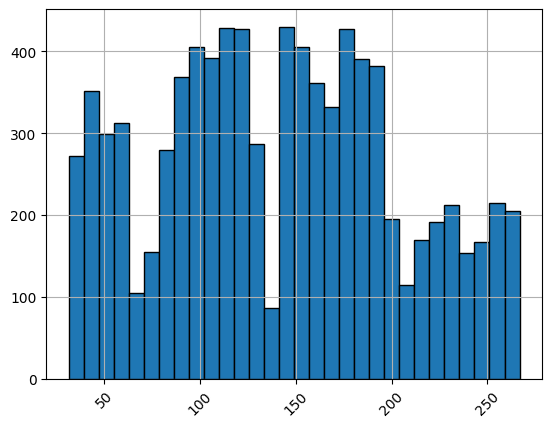

In [29]:
ax = df_sales['Item_MRP'].hist(bins = 30, edgecolor = 'black')
ax.tick_params(axis='x', rotation = 45)
ax.ticklabel_format(style='plain')

In [30]:
df_sales['Item_MRP'].describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

# Boxplots

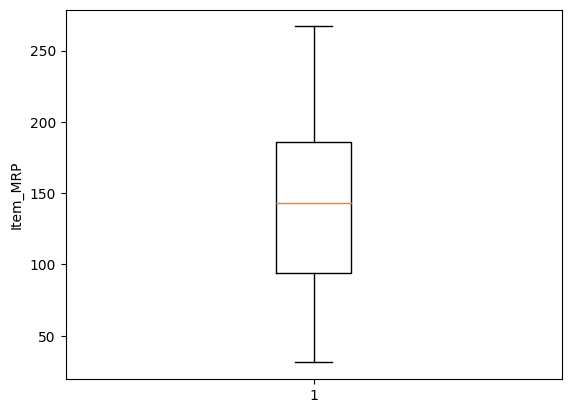

In [31]:
fig, ax = plt.subplots()
data = df_sales["Item_MRP"]
ax.boxplot(data);
ax.set_ylabel("Item_MRP");


# Countplots

In [20]:
df_sales[col_cat].nunique()

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                4
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

<ipython-input-32-698f8c86bb10>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


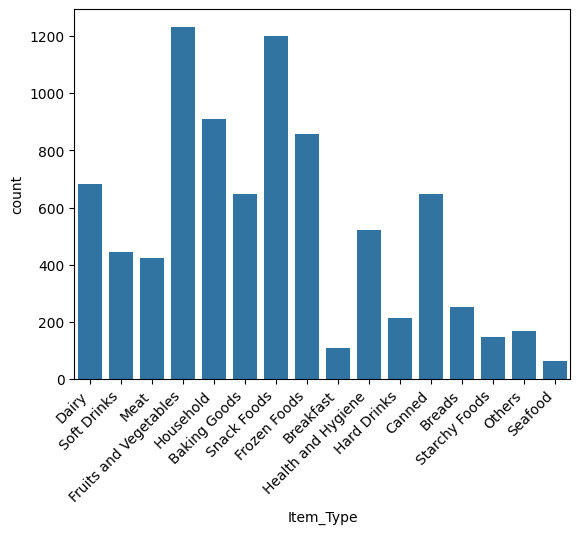

In [32]:

ax = sns.countplot(data=df_sales, x="Item_Type")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

c

# Correlation

In [33]:
corr = df_sales.corr(numeric_only = True)
corr.round(2)

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Visibility,1.00,-0.00,-0.07,-0.13
Item_MRP,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,-0.13,0.57,-0.05,1.00


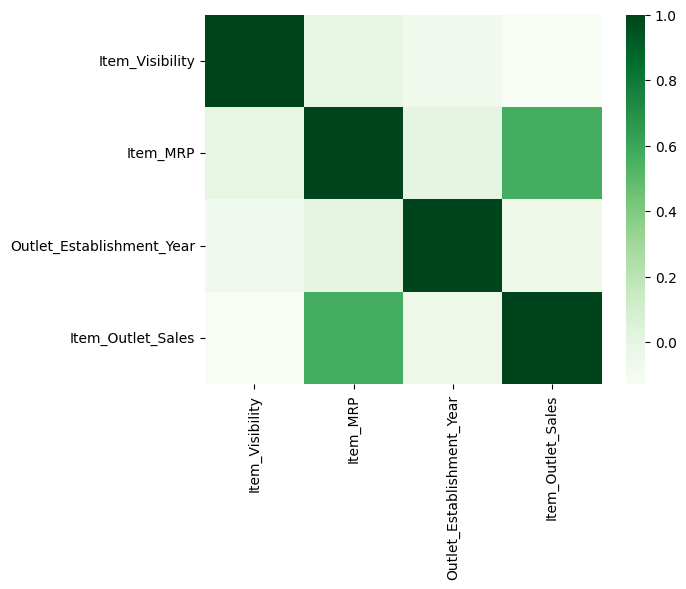

In [34]:
sns.heatmap(corr, cmap = 'Greens');

In [35]:
sales_df=df_sales.copy()

In [53]:
x = 'Item_Type'

placeholder = 'nullvalue'

sales_df[x] = sales_df[x].fillna(placeholder)

<ipython-input-54-43e0176fab78>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


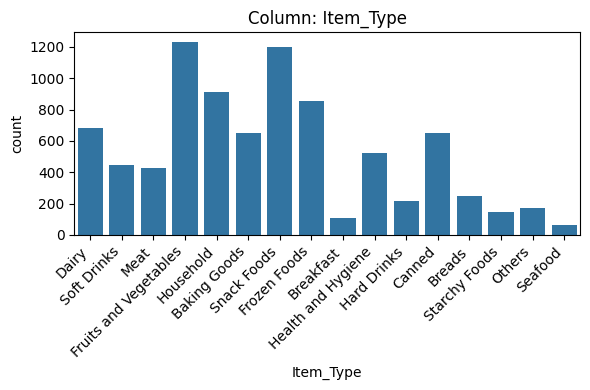

In [54]:

fig, ax = plt.subplots(figsize=(6,4))

sns.countplot(data=sales_df, x=x, ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

ax.set_title(f"Column: {x}")
fig.tight_layout()

In [61]:
def explore_categorical(df_sales, x, fillna=True, placeholder = 'nullvalue'):

  sales_df = df_sales.copy()
  # fillna with placeholder
  if fillna == True:
    sales_df[x] = sales_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=(6,4))
  # Plotting a count plot
  sns.countplot(data=sales_df, x=x, ax=ax)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}")
  fig.tight_layout()

<ipython-input-61-31ec4d7b36f5>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


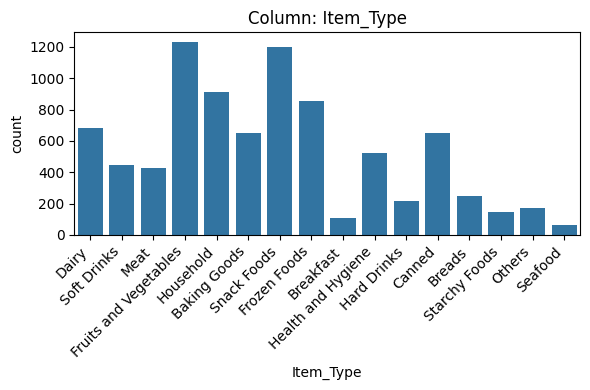

In [62]:
explore_categorical(df_sales, x='Item_Type');

What is the cardinality? Is it high (>10)?
yes

In [63]:
nunique = sales_df[x].nunique()
print(f"- Unique Values: {nunique}")

- Unique Values: 16


What type of feature is it? (Categorical (nominal), ordinal, numeric) :
it's a nominal feature

Is the feature constant or quasi-constant :

In [65]:
val_counts = sales_df[x].value_counts(dropna=False)
val_counts

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [66]:
most_common_val = val_counts.index[0]
most_common_val

'Fruits and Vegetables'

In [67]:
freq = val_counts.values[0]
freq

1232

In [69]:
perc_most_common =(freq / len(sales_df) *100)
perc_most_common

14.455004106535258

In [70]:
if perc_most_common >98:
  print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
else:
  print("- Not constant or quasi-constant.")

- Not constant or quasi-constant.


Would we know this BEFORE the target is determined?
Yes.










Is there a business case/understanding reason to exclude based on our business case?



















Possibly, it may not be possible for a homeowner to modify the utilities available.

In [80]:
x = "Item_Type"
y = "Item_MRP"




In [81]:
def plot_categorical_vs_target(df, x, y='SalePrice',figsize=(6,4),
                            fillna = True, placeholder = 'nullvalue',
                            order = None):
  # Make a copy of the dataframe and fillna
  sales_df = df_sales.copy()
  # fillna with placeholder
  if fillna == True:
    sales_df[x] = sales_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    sales_df = sales_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=sales_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=sales_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)

  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  ax.set_title(f"{x} vs. {y}")
  fig.tight_layout()

ValueError: Could not interpret value `SalePrice` for `y`. An entry with this name does not appear in `data`.

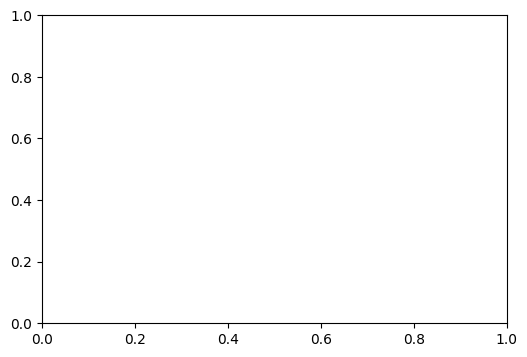

In [82]:
fig, ax = plot_categorical_vs_target(df_sales, x='Item_Type', fillna=False)

Based on your business understanding, would you expect this feature to be a predictor of the target?
Yes, I would expect the quality of a garage to impact the sale price.